In [67]:
# Initialize Otter
import otter
grader = otter.Notebook("Assignment 7 - Covariance And Correlation, Independence - Sampling.ipynb")

# Homework 7: 

## Due on Gradescope


## Collaboration Policy

Data science is a collaborative activity.  However a key step in learning and retention is **creating solutions on your own.**  

Please see the **Course Syllabus for the Collaboration Policy**.

On the other hand, the following are some **examples of things which would NOT usually be
considered to be cheating**:
 - Working on a HW problem on your own first and then discussing with a classmate a particular part in the problem solution where you are stuck.  After clarifying any questions you should then continue to write your solution independently.
 - Asking someone (or searching online) how a particular construct in the language works.
 - Asking someone (or searching online) how to formulate a particular construct in the language.
 - Asking someone for help in finding an error in your program.  
 - Asking someone why a particular construct does not work as you expected in a given program.
   

To test whether you are truly doing your own work and retaining what you've learned you should be able to easily reproduce from scratch and explain a HW solution that was your own when asked in office hours by an Instructor or on a quiz/exam.   


If you have difficulty in formulating the general solution to a problem on your own, or
you have difficulty in translating that general solution into a program, it is advisable to see
your instructor.

We are here to help!  Visit OH Hours and/or post questions on Piazza!


If while completing this assignment you reference any websites other than those linked in this assignment or provided on Canvas please list those references here:

**External references**:  *list any websites you referenced

#### Grading
Grading is broken down into autograded answers and manually graded answers. 

For autograded answers, the results of your code are compared to provided and/or hidden tests.

For manually graded answers you must show and explain all steps.  Graders will evaluate how well you answered the question and/or fulfilled the requirements of the question.


### Score breakdown



Question | Points | Grading Type
--- | --- | ---
Question 1abc | 3 | autograded
Question 1d | 2 | manual
Question 2 | 9 | manual
Question 3 | 7 | autograded
Question 4 | 2 | manual
Question 5ad | 5 | manual
Question 5bcef | 6 | autograded
Question 6abe| 7 | manual
Question 6cd| 3 | autograded
Question 7a | 1 | autograded
Question 7bcd | 5 | manual
|Total | 50

In [68]:
import numpy as np
import pandas as pd
import math
import scipy.stats as stats
from scipy import special
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, Latex, Markdown

plt.style.use('fivethirtyeight')
# Default plot configurations
plt.rcParams['figure.figsize'] = (16,8)
plt.rcParams['figure.dpi'] = 150
sns.set()

%matplotlib inline

<a id='top'></a>
---
**Shortcuts:**  [Problem 2](#p2) | [Problem 3](#p3) | [Problem 4](#p4) |  [Problem 5](#p5) | [Problem 6](#p6) | [Problem 7](#p7) | 

               
---
<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />



# Part 1:  Joint Distributions, Covariance and Correlation

## (5 pts) Problem 1 :

Suppose $X$ and $Y$ are two discrete random variables with the following joint probability mass function:



$$
\begin{array}{|c|c|c|}
\hline
 & Y=1 & Y=2 \\
\hline
X=1 & \frac{1}{3} &  \\
\hline
X=2 & \frac{1}{6} & 0  \\
\hline
X=4 & \frac{1}{12} & \frac{1}{3}  \\
\hline
\end{array}
$$




**Part A)**
What is $P(X=1, Y=2)$?  


In [69]:
prob_xequals1_and_yequals2 = 1 - ((1 / 3) + (1 / 6) + (1 / 12) + (1 / 3) + 0)

In [70]:
grader.check("q1a")

q1a results: All test cases passed!

**Part B)**
Find the marginal PMF for X, (i.e. find $P(X=x)$ for $x=1, 2, 4$).  

In [71]:
prob_x_equals_1 = (1 / 3) + (1 / 12)
prob_x_equals_2 = (1 / 6) + 0
prob_x_equals_4 = (1 / 12) + (1 / 3)

In [72]:
grader.check("q1b")

q1b results: All test cases passed!

**Part C)**
Find the marginal PMF for Y (i.e. find $P(Y=y)$ for $y = 1, 2$)

In [73]:
prob_y_equals_1 = (1 / 3) + (1 / 6) + (1 / 12)
prob_y_equals_2 = (1 / 12) + 0 + (1 / 3)

In [74]:
grader.check("q1c")

q1c results: All test cases passed!

<!-- BEGIN QUESTION -->

**Part D)**
Are $X$ and $Y$ independent or dependent?  Fully justify your answer in the cell below using LaTeX and the mathematical definition of independence.

The mathematical definition of independence says

$$
P(a \cap b) = P(a)P(b).
$$

Take for example when $X = 1$ and $Y = 1$. The joint probability in this case is 

$$
P((X = 1) \cap (Y = 1)) = \frac{1}{3}.
$$

This means, if these variables are independent we constitute that 

$$
P((X = 1) \cap (Y = 1)) = P(X = 1)P(Y = 1)
$$

is true. We know from the previous parts of this problem that $P(X = 1) \frac{5}{12}$ and $P(Y = 1) = \frac{7}{12}$. Putting this together we can see

$$
P(X = 1)P(Y = 1) = \frac{5}{12} \cdot \frac{7}{12} = \frac{35}{144}
$$

which is **NOT** equal to the value of $P((X = 1) \cap (Y = 1)) = \frac{1}{3}$. Because of this we can then say

$$
P((X = 1) \cap (Y = 1)) \neq P(X = 1)P(Y = 1)
$$

and therefore we can conclude from this one example that $X$ and $Y$ are **NOT INDEPENDENT**. Showing that one of these cases is not independent is enough to conclude that these variables are not independent.

<!-- END QUESTION -->

To check your answer to question 1d, enter a boolean value, True or False (note to receive credit on 1d you must mathematically justify your answer in the cell above). 

In [75]:
x_y_independent = False

In [76]:
grader.check("q1d_check")

q1d_check results: All test cases passed!

***

[Back to top](#top)

<a id='p2'></a>


## (9 pts) Problem 2 :

The following parts are **NOT** related:


<!-- BEGIN QUESTION -->

**Part A)**
If $\text{Cov}(X,Y)=0$, what does this tell us about the random variables X and Y?  


If the covariance of two variables is 0, this implies that there is **no linear relationship** between the two variables. It does not implicate necessarily that the two variables are independent, it just tells us that there is no linear relationship between these two variables.

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

**Part B)**  Given the following joint pmf for discrete random variables $X$ and $Y$:

$$
\begin{array}{|c|c|c|c|}
\hline
 & Y=0 & Y=1 & Y=2 \\
\hline
X=0 & \frac{1}{6} & \frac{1}{4} &\frac{1}{8} \\
\hline
X=1 & \frac{1}{8} & \frac{1}{6} &\frac{1}{6} \\
\hline
\end{array}
$$


 - i).  Calculate $\text{Cov}(X,Y)$.  
 - ii).  Calculate $\rho(X,Y)$   
 


Show all steps for both parts using Markdown and LaTeX in the cell below:

### Part i

The mathematical formula for calculating the covariance of two variables is 

$$
\text{Cov}(X,Y) = E[XY] - E[X]E[Y].
$$

We first need to fill out a table so that we have the marginal PMF of each variable:

$$
\begin{array}{|c|c|c|c|c|}
\hline
 & Y=0 & Y=1 & Y=2 & \\
\hline
X=0 & \frac{1}{6} & \frac{1}{4} &\frac{1}{8} & \frac{13}{24} \\
\hline
X=1 & \frac{1}{8} & \frac{1}{6} &\frac{1}{6} & \frac{11}{24}  \\
\hline
 & \frac{7}{24} & \frac{10}{24} & \frac{7}{24} & 1 \\
\hline
\end{array}
$$

We next calculate $E(X)$ which is 

$$
E(X) = \sum_{i = 0}^{1} X_{i} P(X_{i}) = 0 \cdot \frac{13}{24} + 1 \cdot \frac{11}{24}.
$$

Now $E(y)$ which is 

$$
E(Y) = \sum_{i = 0}^{1} Y_{i} P(Y_{i}) = 0 \cdot \frac{7}{24} + 1 \cdot \frac{10}{24} + 2 \cdot \frac{7}{24} = \frac{10}{24} + \frac{14}{24} = 1.
$$

Now $E(XY)$ which is 

$$
E(XY) = (1 \cdot 0) \cdot \frac{1}{8} + (1 \cdot 1) \cdot \frac{1}{6} + (1 \cdot 2) \cdot \frac{1}{6} = 0 + \frac{3}{6} = \frac{12}{24}.
$$

Now, combining these results we then have

$$
\text{Cov}(X,Y) = E[XY] - E[X]E[Y] = \frac{12}{24} - \frac{11}{24} = \color{blue}{\frac{1}{24}}.
$$

### Part ii

The mathematical for correlation is 

$$
\rho(X,Y) = \frac{\text{Cov}(X,Y)}{\text{SD}(X)\text{SD}(Y)}
$$

All we need to do is calculate the standard deviation of $X$ and $Y$. The formula for standard deviation is 

$$
\sigma_{\alpha} = \sqrt{\text{Var}(\alpha)} = \sqrt{E(\alpha^{2}) - E(\alpha)^{2}}.
$$

So we first need to calculate the variances of $X$ and $Y$. The variance of $X$ is 

\begin{align}
\text{Var(X)} & = E(X^{2}) - E(X)^{2} \\
& = \left(\sum_{i} X_{i}^{2} P(X_{i}) \right) - \left(\sum_{i} X_{i} P(X_{i}) \right)^{2} \\
& = \left(0^{2} \cdot \frac{13}{24} + 1^{2} \cdot \frac{11}{24} \right) - \left( 0 \cdot \frac{13}{24} + 1 \cdot \frac{11}{24} \right)^{2} \\
& = \frac{11}{24} - \left( \frac{11}{24} \right)^{2} = \frac{11}{24} \left( 1 - \frac{11}{24} \right) = \frac{11}{24} \cdot \frac{13}{24} = \color{blue}{\frac{143}{576}}.
\end{align}

The variance of $Y$ is then

\begin{align}
\text{Var(Y)} & = E(Y^{2}) - E(Y)^{2} \\
& = \left(\sum_{i} Y_{i}^{2} P(Y_{i}) \right) - \left(\sum_{i} Y_{i} P(Y_{i}) \right)^{2} \\
& = \left( 0^{2} \cdot \frac{7}{24} + 1^{2} \cdot \frac{10}{24} + 2^{2} \cdot \frac{7}{24} \right) - \left( 0 \cdot \frac{7}{24} + 1 \cdot \frac{10}{24} + 2 \cdot \frac{7}{24} \right)^{2} \\
& = \left( \frac{10}{24} + \frac{28}{24} \right) - \left( \frac{10}{24} + \frac{14}{24} \right)^{2} \\
& = \frac{38}{24} - 1^{2} = \color{blue}{\frac{14}{24}}.
\end{align}

This then means our standard deviations are then

\begin{align}
\sigma_{Y} & = \color{blue}{\sqrt{\frac{143}{576}}} \\
\sigma_{Y} & = \color{blue}{\sqrt{\frac{14}{24}}}
\end{align}

Putting this altogether the correlation of $X$ and $Y$ is then

\begin{align}
\rho(X,Y) & = \frac{1 / 24}{\sqrt{\frac{143}{576}}\sqrt{\frac{14}{24}}} \\
& = \frac{\sqrt{\frac{1}{576}}}{\sqrt{\frac{143}{576}}\sqrt{\frac{14}{24}}} \\
& = \sqrt{\frac{24}{143 \cdot 14}} = \sqrt{\frac{12}{143 \cdot 7}} \\
& = \sqrt{\frac{12}{1001}} = \color{blue}{2 \sqrt{\frac{3}{1001}}}.
\end{align}


<!-- END QUESTION -->

To check your answer for Problem 2bi, enter the answer you came up with (just the number) in the cell below. Note that this is just a public test. Full credit requires that you show all your work written in LaTeX fully justifying your answer in the cell above.  

In [77]:
cov_xy = 1 / 24

In [78]:
grader.check("q2bi_check")

q2bi_check results: All test cases passed!

To check your answer for Problem 2bii, enter the answer you came up with (just the number) in the cell below. Note that this is just a public test. Full credit requires that you show all your work written in LaTeX fully justifying your answer in the cell above.  

In [79]:
p_xy = 2 * np.sqrt(3 / 1001)

In [80]:
grader.check("q2bii_check")

q2bii_check results: All test cases passed!

<!-- BEGIN QUESTION -->

**Part C)**
This part is **NOT** related to the parts above.  
Suppose you're only given the following information about two joint random variables $X$ and $Y$:  

$$ 
\mu_X = 6, \hspace{2mm} \mu_Y = 5, \hspace{2mm} \sigma_X^2 = 4, \hspace{2mm} \sigma_Y^2=9 \text{ and }  E[XY]=27 
$$

For each of the quantities below, calculate if you have enough information, showing all steps.  If not, explain what additional info you'd need.

i).  $\text{Cov}(X,Y)$

ii).  $\text{Cov}(Y,X)$

iii).  $\rho(X,Y)$

Answer all parts in the ONE markdown cell below, fully justifying your answer:

### Part i

Using the given information the covariance of $X$ and $Y$ can be calculated with

$$
\text{Cov}(X,Y) = E[XY] - E[X]E[Y] = E[XY] - \mu_{X}\mu_{Y} = 27 - (6)(5) = 27 - 30 = \color{blue}{-3}.
$$

### Part ii

The covariance of $Y$ and $X$ is the same as the covariance of $X$ and $Y$ in this context, so

$$
\text{Cov}(Y,X) = \color{blue}{-3}.
$$

### Part iii

The correlation of $X$ and $Y$ is calculated with 

$$
\rho(X,Y) = \frac{\text{Cov}(X,Y)}{\sigma_{X}\sigma_{Y}} = \frac{-3}{\sqrt{4}\sqrt{9}} = \frac{-3}{2(3)} = \color{blue}{-\frac{1}{2}}.
$$

<!-- END QUESTION -->

To check your answers for Problem 2c, enter the answers you came up with (just the numbers) in the cell below. Note that this is just a public test. Full credit requires that you show all your work written in LaTeX fully justifying your answer in the cell above.  

In [81]:
cov_xy = -3
cov_yx = -3
p_xy = - (1 / 2)

In [82]:
grader.check("q2c_check")

q2c_check results: All test cases passed!

<hr>

# Part 2 Introduction

The outcome of the US presidential election in 2016 took many people and many pollsters by surprise. In this assignment we will carry out a simulation study / post mortem in an attempt to understand what happened.

***

[Back to top](#top)

<a id='p3'></a>


## (7 pts) Problem 3

In Pennsylvania, 6,165,478 people voted in the 2016 Presidential election.
Trump received 48.18% of the vote and Clinton recieved 47.46%.
This doesn't add up to 100% because other candidates received votes.
All together these other candidates received 100% - 48.18% - 47.46% = 4.36% of the vote.

The table below displays the counts and proportions.


|   Voted for   |  Trump|    Clinton|    Other|
|-----------|-----------|-----------|---------|
| Probability      |   0.4818   | 0.4746  |   0.0436 |
| Number of people | 2,970,733  | 2,926,441 | 268,304 |

### 3a)
Suppose we pick a simple random sample of 20 of the 6,165,478 Pennsylvania (PA) voters. 

In the sample, let $N_T$ be the number of Trump voters, $N_C$ the number of Clinton voters, and $N_O$ the number of "other" voters. Then $N_T$, $N_C$, and $N_O$ are random: they depend on how the sample comes out. Such quantities are called "statistics".

Pick the correct option: $N_T + N_C + N_O$ is equal to

(a) 3

(b) 20

(c) 6,165,478

(d) a random quantity

*Note*: if your answer is (d), put  **ans_3a = 'd'**  for the purpose of grading. Passing the test below **does NOT** mean you answer is correct (there are hidden tests that will check this question when you submit your assignment). The test below only checks if your answer is in the correct format.

In [83]:
ans_3a = 'c'

In [84]:
grader.check("q3a")

q3a results: All test cases passed!

### 3b) 
Pick the correct option.

A simple random sample of 20 PA voters is like a sample drawn at random with replacement, because

(a) that's the definition of "simple random sample"

(b) there are only 3 categories of voters, which is small in comparison to 20

(c) there are only 20 people in the sample, which is small in comparison to the total number of PA voters

(d) all PA voters are equally likely to be selected

*Note*: if your answer is (d), put **ans_3a = 'd'**  for the purpose of grading. Passing the test below **does NOT** mean you answer is correct (there are hidden tests that will check this question when you submit your assignment). The test below only checks if your answer is in the correct format.

In [85]:
ans_3b = 'c'

In [86]:
grader.check("q3b")

q3b results: All test cases passed!

### 3c)

Let $t$, $c$, and $o$ be any three non-negative integers. For the sample defined in Part **a**, the probability that the sample contains $t$ Trump voters, $c$ Clinton voters and $o$ "other" voters is denoted by $P(N_T = t, N_C = c, N_O = o)$.

Define a function `prob_sample_counts` that takes any three non-negative integers $t$, $c$, and $o$, and returns $P(N_T = t, N_C = c, N_O = o)$. The probability is 0 for some choices of the arguments, and your function should return 0 in those cases.

Remember that Part **b** implies you can use results for sampling with replacement.


In [87]:
def prob_sample_counts(t, c, o):
    """
    Input:
    t - number of votes for Trump
    c - number of votes for Clinton
    o - number of votes for Other
    Return: The probability of getting a such sample
    """
    if (t + c + o != 20):
        return 0
    else:
        total = 6165478
        trumpProb = np.power(0.4818, t)
        clintonProb = np.power(0.4746, c)
        otherProb = np.power(0.0436, o)
        ret = (special.factorial(20) / (special.factorial(t) * special.factorial(c) * special.factorial(o))) * (trumpProb) * (clintonProb) * (otherProb)
        return ret
    # your code above this line

In [88]:
grader.check("q3c")

q3c results: All test cases passed!

### 3d) 

Check that your function determines a probability distribution by summing all the positive terms. You know what the sum should be. **Hint: You might need to iterate through certain values of c and t to compute the sum of all positive probabilities.**

In [89]:
prob_3d = sum(prob_sample_counts(i, j, k) for i in range(0,21) for j in range(0, 21) for k in range(0,21))
prob_3d

1.0000000000000007

In [90]:
grader.check("q3d")

q3d results: All test cases passed!

### 3e)
Use `prob_sample_counts` to find the chance that the sample consists of 11 Trump voters, 8 Clinton voters, and 1 "other" voter.

In [91]:
prob_3e = prob_sample_counts(11, 8, 1)
prob_3e

0.055092374118670545

In [92]:
grader.check("q3e")

q3e results: All test cases passed!

### 3f)
Write an expression that evaluates the chance that the sample contains at least 7 Trump voters, at least 7 Clinton voters, and at least 1 "other" voter. **Hint: You might find 3d useful.**

In [93]:
prob_3f = sum(prob_sample_counts(t, c, 20 - (t + c)) for t in range(7, 13) for c in range(7, 20 - t))
prob_3f

0.46938707665092416

In [94]:
a=np.array([prob_sample_counts(t, c, 20-(t+c)) for t in range(7, 13) for c in range(7, 20-t)])

print(a)

[2.98683815e-05 2.43845193e-04 1.47462957e-03 6.42072654e-03
 1.90613646e-02 3.45815123e-02 2.47544488e-04 1.68412577e-03
 8.14766658e-03 2.66069901e-02 5.26592055e-02 1.51971119e-03
 8.27127214e-03 3.00118177e-02 6.53376545e-02 6.71740230e-03
 2.74204054e-02 6.63288705e-02 2.02446482e-02 5.50923741e-02
 3.72854416e-02]


In [95]:
grader.check("q3f")

q3f results: All test cases passed!

## Election Polling

Political polling is a type of public opinion polling that can at best represent a snapshot of public opinion at the particular moment in time. Voter opinion shifts from week to week, even day to day, as candidates battle it out on the campaign field.

Polls usually start with a "horse-race" question, where respondents are asked whom they would vote for in a head-to-head race if the election were tomorrow: Candidate A or Candidate B. The survey begins with this question so that the respondent is not influenced by any of the other questions asked in the survey. Some of these other questions are asked to help assess how likely is it that the respondent will vote. Other questions are asked about age, education, and sex in order to adjust the findings if one group appears overly represented in the sample.

Pollsters typically use [random digit dialing](https://en.wikipedia.org/wiki/Random_digit_dialing) to contact people.

<!-- BEGIN QUESTION -->

***

[Back to top](#top)

<a id='p4'></a>

## (2 pts) Problem 4


If we're trying to predict the results of the Clinton vs. Trump 2016 presidential race:

i).  What is the population of interest? 

ii).  What is the sampling frame?

Give both of your answers in the same below in Markdown.

### Part i

The population of interest are the people in the United States who are eligible to vote. This takes into account the people who are going to vote as well as the people who are not going to vote.

### Part ii

The sampling frame is the list of people who are registered to vote. This takes into account people who are most likely going to vote in the election.

<!-- END QUESTION -->

### How might the sampling frame differ from the population?

After the fact, many experts have studied the 2016 election results. For example, according to the American Association for Public Opinion Research (AAPOR), predictions made before the election were flawed for three key reasons:

1. voters changed their preferences a few days before the election
2. those sampled were not representative of the voting population, e.g., some said that there was an overrepresentation of college graduates in some poll samples 
3. voters kept their support for Trump to themselves (hidden from the pollsters)



The 1st and 3rd biases (voters changing preference and voters hiding their preference) can only be determined after the election. It might be possible to assess this with a post election survey where people were asked about these things.   

In the rest of this assignment we will focus on analyzing the 2nd  type of bias:


+ Question 5: We will carry out a study of the sampling error when there is no bias. In other words, we will try to compute the chance that we get the election result wrong even if we collect our sample in a manner that is completely correct. In this case, any **failure of our prediction is due entirely to random chance**.
+ Question 6: We will carry out a study of the sampling error when there is bias of the second type from the list above. In other words, we will try to compute the chance that we get the election result wrong if we have a small systematic bias. In this case, any failure of our prediction is due to a **combination of random chance and our bias**.



### How large was the sampling error?

In some states the race was very close, and it may have been simply sampling error, i.e., random chance that the majority of the voters chosen for the sample voted for Clinton.

A 2- or 3-point polling error in Trump’s favor (typical error historically) would likely be enough to tip the Electoral College to him.

One year after the 2016 election, Nate Silver (https://substack.com/@natesilver) wrote in
*The Media Has A Probability Problem* that
the "media’s demand for certainty -- and its lack of statistical rigor -- is a bad match for our complex world."
FiveThirtyEight forecasted that Clinton had about a 70 percent chance of winning.  

We will first carry out a simulation study to assess the impact of the sampling error on the predictions.


## The Electoral College

The US president is chosen by the Electoral College, not by the
popular vote. Each state is alotted a certain number of 
electoral college votes, as a function of their population.
Whomever wins in the state gets all of the electoral college votes for that state.

There are 538 electoral college votes (hence the name of the website Nate Silver started, FiveThirtyEight: https://projects.fivethirtyeight.com/polls/).

Pollsters correctly predicted the election outcome in 46 of the 50 states. 
For these 46 states Trump received 231 and Clinton received 232 electoral college votes.

The remaining 4 states accounted for a total of 75 votes, and 
whichever candidate received the majority of the electoral college votes in these states would win the election. 

These states were Florida, Michigan, Pennsylvania, and Wisconsin.

|State |Electoral College Votes|
| --- | --- |
|florida | 29 |
|michigan | 16 |
|pennsylvania | 20 |
|wisconsin | 10|

For Donald Trump to win the election, he had to win either:
* Florida + one (or more) other states
* Michigan, Pennsylvania, and Wisconsin


In the final results the electoral margins were very narrow in these four states, as seen below:


|State | % Trump |   % Clinton | Total Voters |
| --- | --- |  --- |  --- |
|florida | 49.02 | 47.82 | 9,419,886  | 
|michigan | 47.50 | 47.27  |  4,799,284|
|pennsylvania | 48.18 | 47.46 |  6,165,478|
|wisconsin | 47.22 | 46.45  |  2,976,150|

Those narrow electoral margins can make it hard to predict the outcome **given the sample sizes** that the polls used. 

---
## Simulation Study of the Sampling Error

Now that we know how people actually voted, we can carry
out a simulation study that imitates the polling.

Our ultimate goal in this problem is to use the actual voting percentages to simulate polling results and **understand the chance that we will incorrectly call the election for Hillary Clinton even if our sample was collected with absolutely no bias**.

<!-- BEGIN QUESTION -->

***

[Back to top](#top)

<a id='p5'></a>


## Problem 5 (11 pts) 

#### Part A

For your convenience, the actual results of the vote in the four pivotal states is repeated below:

|State |% Trump |   % Clinton | Total Voters |
| --- | --- |  --- |  --- |
|florida | 49.02 | 47.82 | 9,419,886  | 
|michigan | 47.50 | 47.27  |  4,799,284|
|pennsylvania | 48.18 | 47.46 |  6,165,478|
|wisconsin | 47.22 | 46.45  |  2,976,150|


Using the table above, write a function `draw_state_sample(N, state)` that returns a sample with replacement of N voters from the given state, using the percentages given in the table above. Your result should be returned as a list, where the first element is the number of Trump votes, the second element is the number of Clinton votes, and the third is the number of Other votes. For example, `draw_state_sample(1500, "florida")` could return `[727, 692, 81]`. You may assume that the state name is given in all lower case.  

**Hint:** You might find `np.random.multinomial` useful.


In [96]:
def draw_state_sample(N, state):
    trump = 0
    clinton = 0
    if (state == "florida"):
        trump = 0.4902
        clinton = 0.4782
    elif (state == "michigan"):
        trump = 0.4750
        clinton = 0.4727
    elif (state == "pennsylvania"):
        trump = 0.4818
        clinton = 0.4746
    elif (state == "wisconsin"):
        trump = 0.4722
        clinton = 0.4645
    other = 1 - (trump + clinton)
    sample = np.random.multinomial(N, [trump, clinton, other])
    return sample.tolist()

In [97]:
grader.check("q5a")

q5a results: All test cases passed!

<!-- END QUESTION -->

#### Part B

Now, create a function `trump_advantage` that takes in list of sample of votes (like the one returned by `draw_state_sample`) and returns the difference in the proportion of votes between Trump and Clinton. For example `trump_advantage([100, 60, 40])` should return `0.2`, since Trump had 50% of the votes in this sample and Clinton had 30%.  In contrast, `trump_advantage([60, 100, 40])` should return `-0.2`

In [98]:
def trump_advantage(voter_sample):
    tot = sum(voter_sample)
    trumpRat = voter_sample[0] / tot
    clintonRat = voter_sample[1] / tot
    return trumpRat - clintonRat

In [99]:
grader.check("q5b")

q5b results: All test cases passed!

#### Part C

Simulate Trump's advantage across 100,000 simple random samples of 1500 voters for the state of Pennsylvania and store the results of each simulation in an `np.array` called `simulations`. 

That is, `simulations[i]` should be Trump's proportion advantage for the `i+1`th simple random sample.

In [100]:
simulations = np.empty(100000)
for i in range(100000):
    temp = draw_state_sample(1500, "pennsylvania")
    simulations[i] = trump_advantage(temp)


In [101]:
grader.check("q5c")

q5c results: All test cases passed!

<!-- BEGIN QUESTION -->

#### Part D

i).  Make a **frequency** histogram of `simulations`.   This is a histogram of the sampling distribution of Trump's proportion advantage in Pennsylvania. 

Hint: You should use the [`plt.hist`](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.hist.html) function in your code.

Make sure to include a title as well as axis labels. You can do this using `plt.title`, `plt.xlabel`, and `plt.ylabel`.

ii).  Based on your simulation, what is the probability that a random sample of 1500 will correctly predict that Trump wins Pennsylvania? (i.e. what proportion of these simulations predict a Trump victory?)  Assign your answer to `prob_penn_1500_random_correct`


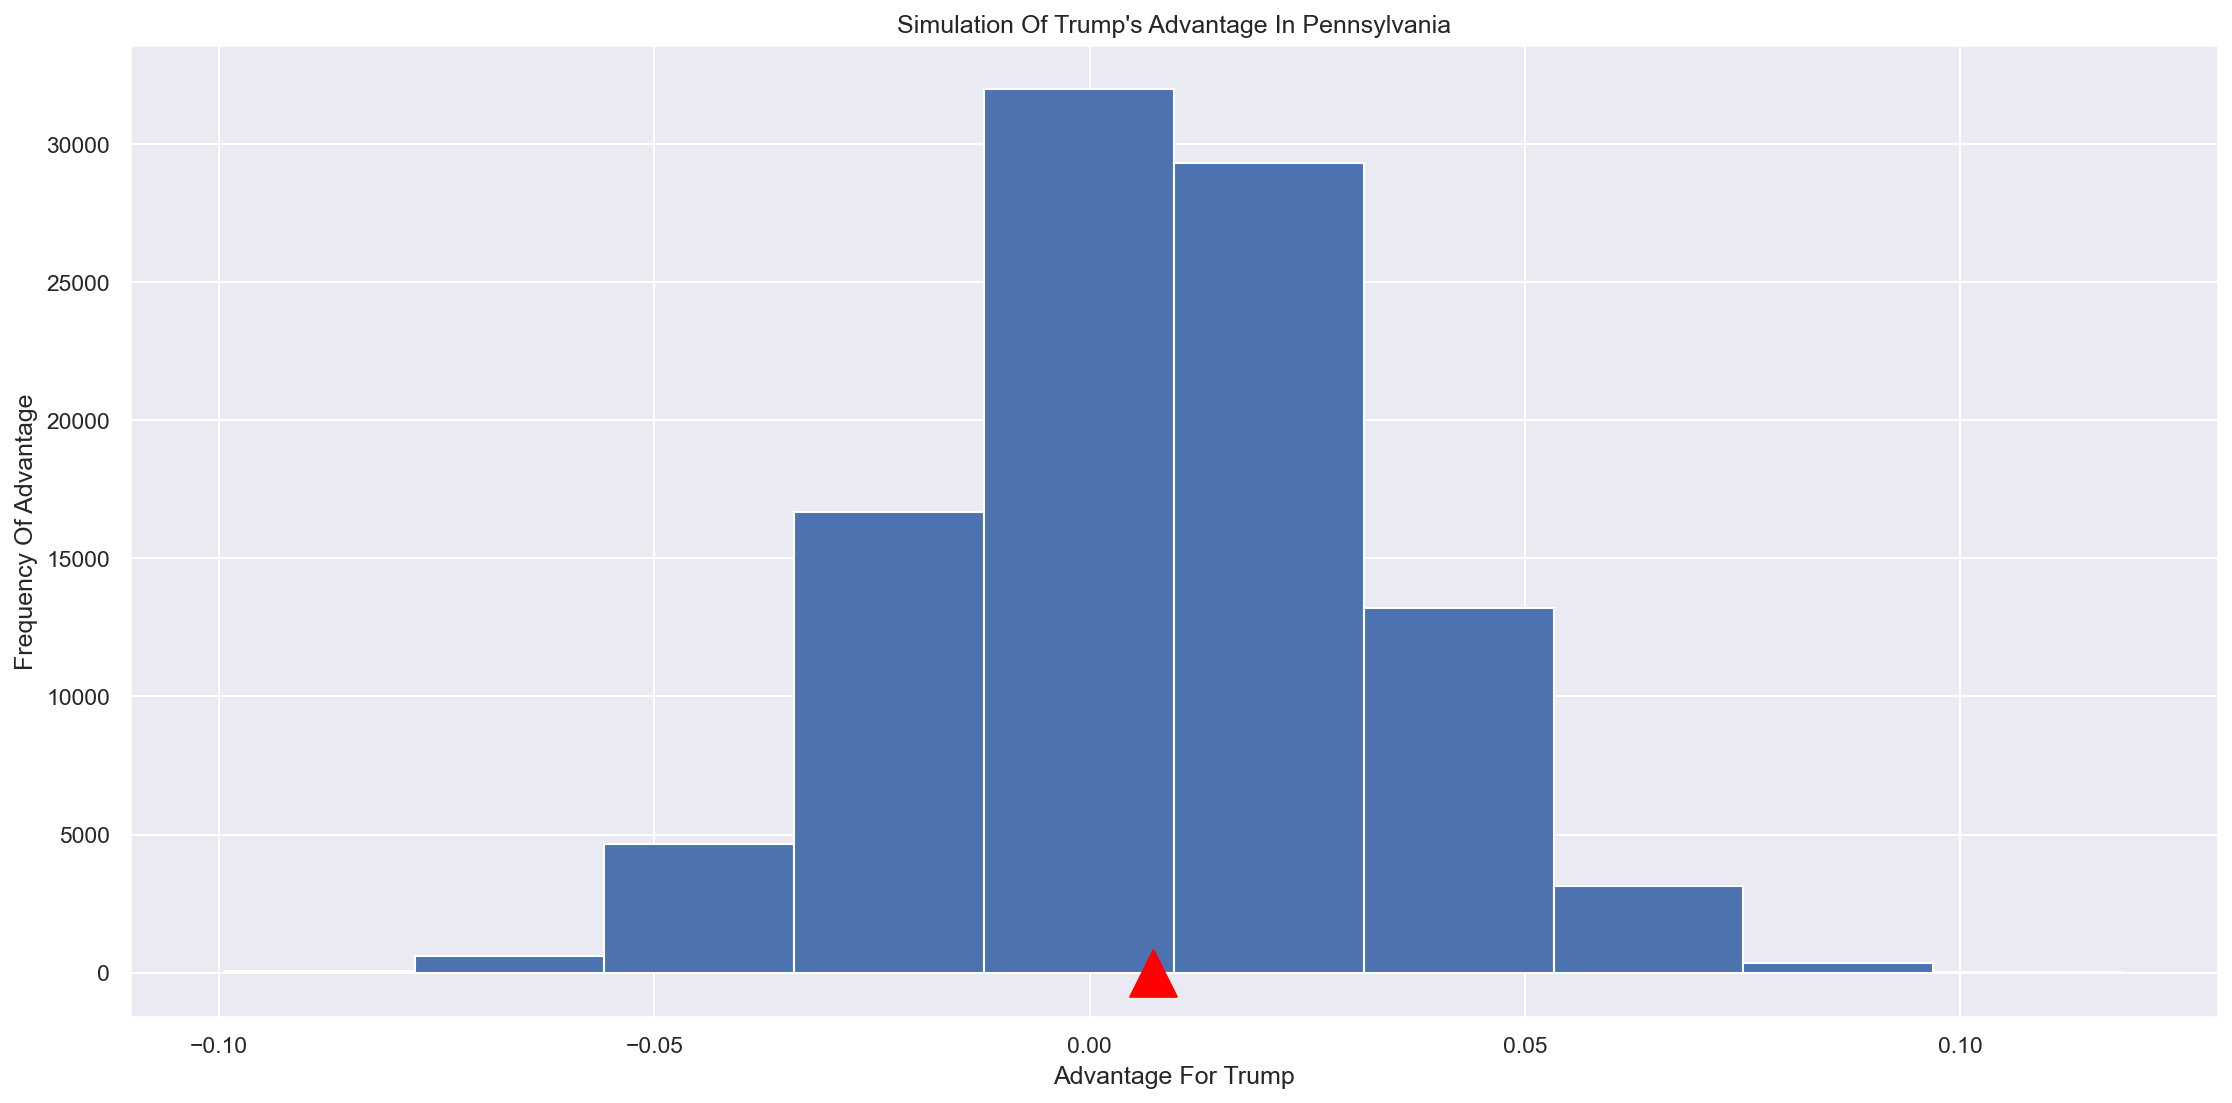

In [102]:
# Part (i):
plt.hist(simulations)
plt.xlabel("Advantage For Trump")
plt.ylabel("Frequency Of Advantage")
plt.title("Simulation Of Trump's Advantage In Pennsylvania")
# your code for the histogram above here.  The code below plots a red marker at the mean:
plt.scatter(simulations.mean(), -1, marker='^', color='red', s=500);

In [103]:
# Part (ii):
prob_penn_1500_random_correct = sum(simulations[i] > 0 for i in range(len(simulations))) / len(simulations)

prob_penn_1500_random_correct

0.60728

<!-- END QUESTION -->

Your result above allows us to calculate the chance that we will incorrectly call the election for Hillary Clinton in Pennsylvania based on the results of this random sample of 1500 even if our sample was collected with absolutely no bias:


In [104]:
prob_penn_1500_random_incorrect = 1-prob_penn_1500_random_correct
prob_penn_1500_random_incorrect

0.39271999999999996

#### Part E

Now write a function `trump_wins(N)` that creates a random sample of N voters for **each of the four crucial states** (that is N voters from Florida, N voters from Michigan, N voters from Pennsylvania, and N voters from Wisconsin) and returns 1 if Trump is predicted to win based on these samples and 0 if Trump is predicted to lose.   
(Hint: use `draw_state_sample` from above) 

Recall that for Trump to win the election, he must either:
* Win the state of Florida and 1 or more other states
* Win Michigan, Pennsylvania, and Wisconsin

Then repeat 100,000 simulations of the election, i.e. call `trump_wins(1500)` 100,000 times and calculate what proportion of these simulations predict a Trump victory. Give your answer as a float stored in `proportion_trump`.

This number represents the percent chance that samples of 1500 from each of the 4 states will correctly predict Trump's victory *if the samples were collected with absolutely no bias*. 


In [105]:
def trump_wins(N):
    FL = draw_state_sample(N, "florida")
    MI = draw_state_sample(N, "michigan")
    PN = draw_state_sample(N, "pennsylvania")
    WI = draw_state_sample(N, "wisconsin")
    if ((FL[0] > FL[1]) and ((MI[0] > MI[1]) or (PN[0] > PN[1]) or (WI[0] > WI[1]))):
        return 1
    elif ((MI[0] > MI[1]) and (PN[0] > PN[1]) and (WI[0] > WI[1])):
        return 1
    else:
        return 0
    
proportion_trump = sum([trump_wins(1500) for _ in range(100000)]) / 100000
proportion_trump

0.69256

In [106]:
grader.check("q5e")

q5e results: All test cases passed!

#### Part F
Based on your work above, what is the chance that we will incorrectly call the election for Hillary Clinton based on the results of random samples of 1500 people in these 4 battleground states **even if our samples were collected with absolutely no bias?**    

In [107]:
prob_election_1500_random_incorrect = 1 - proportion_trump
prob_election_1500_random_incorrect

0.30744000000000005

In [108]:
grader.check("q5f")

q5f results: All test cases passed!

---
## Simulation Study of Selection Bias

According to [an article](https://blogs.lse.ac.uk/usappblog/2018/02/01/better-poll-sampling-would-have-cast-more-doubt-on-the-potential-for-hillary-clinton-to-win-the-2016-election/#Author) by Grotenhuis, Subramanian, Nieuwenhuis, Pelzer and Eisinga:

> In a perfect world, polls sample from the population of voters, who would state their political preference perfectly clearly and then vote accordingly.

That's the simulation study that we just performed. 


It's difficult to control for every source of selection bias.
And, it's not possible to control for some of the other sources of bias.

Next we investigate the effect of small sampling bias on the polling results in these four battleground states.  

Throughout this problem, we'll examine the impacts of a 0.5 percent bias in favor of Clinton in each state. Such a bias has been suggested because highly educated voters tend to be more willing to participate in polls.

<!-- BEGIN QUESTION -->

***

[Back to top](#top)

<a id='p6'></a>



## Problem 6 (10 pts)

Throughout this problem, adjust the selection of voters so that there is a 0.5% bias in favor of Clinton in each of these states. 

For example, in Pennsylvania, Clinton received 47.46\% of the votes and Trump 48.18\%. Increase the population of Clinton voters to 47.46\% + 0.5\%  and correspondingly decrease the percent of Trump voters. 

#### Part A

Simulate Trump's advantage across 100,000 simple random samples of 1500 voters for the **state of Pennsylvania** and store the results of each simulation in an `np.array` called `biased_simulations`.

That is, `biased_simulation[i]` should hold the result of the `i+1`th simulation.

That is, your answer to this problem should be just like your answer from Question 5C, but now using samples that are biased as described above.


In [122]:
def draw_biased_state_sample(N, state):
    trump = 0
    clinton = 0
    bias = 0.005
    if (state == "florida"):
        trump = 0.4902 - bias
        clinton = 0.4782 + bias
    elif (state == "michigan"):
        trump = 0.4750 - bias
        clinton = 0.4727 + bias
    elif (state == "pennsylvania"):
        trump = 0.4818 - bias
        clinton = 0.4746 + bias
    elif (state == "wisconsin"):
        trump = 0.4722 - bias
        clinton = 0.4645 + bias
    other = 1 - (trump + clinton)
    sample = np.random.multinomial(N, [trump, clinton, other])
    return sample.tolist()
    
biased_simulations = np.array([trump_advantage(draw_biased_state_sample(1500, "pennsylvania")) for _ in range(100000)])

In [123]:
grader.check("q6a")

q6a results: All test cases passed!

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

#### Part B

Create a plot of **overlaid DENSITY** histograms of the following:
 - The new sampling distribution of Trump's proportion advantage in Pennsylvania using these biased samples 
  - The sampling distribution of the unbiased samples from Problem 5D (plotted as a density, not a frequency histogram)
  
Include 2 markers (of different colors) with the sample means for each distribution (see 5D for code how to do this).  The colors of the markers should correspond to the colors of the density histograms.

Make sure to give your plot a title, label the x and y axes and include a legend.
Use the parameter `alpha` to adjust the transparency of each histogram.




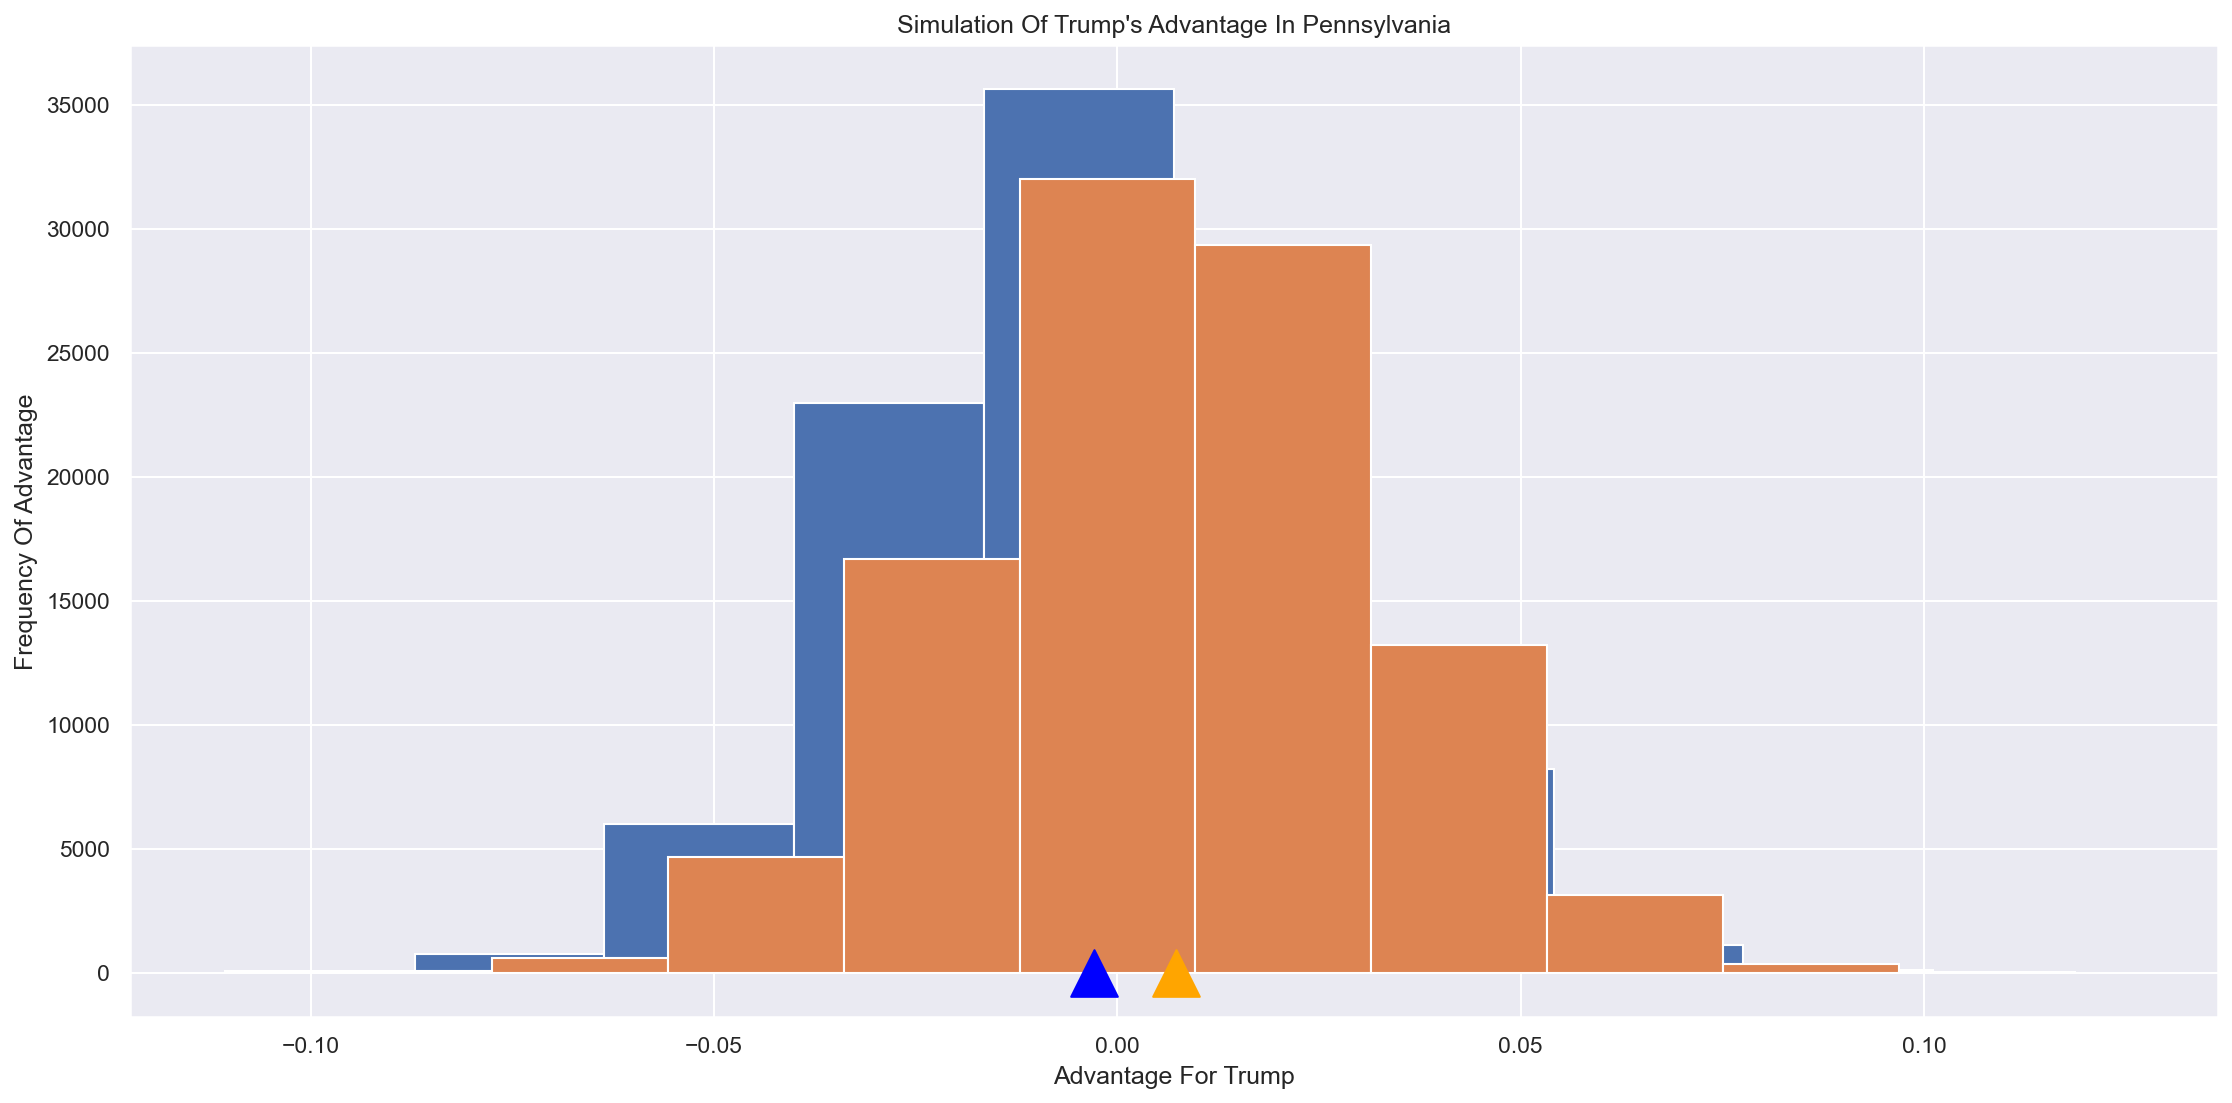

In [127]:
plt.hist(biased_simulations)
plt.hist(simulations)
plt.xlabel("Advantage For Trump")
plt.ylabel("Frequency Of Advantage")
plt.title("Simulation Of Trump's Advantage In Pennsylvania")
# your code for the histogram above here.  The code below plots a red marker at the mean:
plt.scatter(biased_simulations.mean(), -1, marker='^', color='blue', s=500);
plt.scatter(simulations.mean(), -1, marker='^', color='orange', s=500);

<!-- END QUESTION -->

#### Part C

Use your result above to calculate the chance that we will incorrectly call the election for Hillary Clinton in Pennsylvania based on the results of this random sample of 1500 if our sample was collected with this $0.5\%$ bias:


In [130]:
prob_penn_1500_biased_incorrect = 1 - (sum(biased_simulations[i] > 0 for i in range(len(biased_simulations))) / len(biased_simulations))
prob_penn_1500_biased_incorrect

0.5529200000000001

In [131]:
grader.check("q6c")

q6c results: All test cases passed!

#### Part D

Now perform 100,000 simulations of $1500$ voters from **each of the four states** (1500 voters from Pennsylvania, 1500 voters from Michigan, etc)  and return the proportion of these simulations that result in a Trump victory. This is the same fraction that you computed in Question 5e, but now using your biased samples.

Give your answer as `proportion_trump_biased`.

This number represents the chance that a sample biased 0.5% in Hillary Clinton's favor will correctly predict Trump's victory. 

In [132]:
def trump_wins_biased(N): 
    FL = draw_biased_state_sample(N, "florida")
    MI = draw_biased_state_sample(N, "michigan")
    PN = draw_biased_state_sample(N, "pennsylvania")
    WI = draw_biased_state_sample(N, "wisconsin")
    if ((FL[0] > FL[1]) and ((MI[0] > MI[1]) or (PN[0] > PN[1]) or (WI[0] > WI[1]))):
        return 1
    elif ((MI[0] > MI[1]) and (PN[0] > PN[1]) and (WI[0] > WI[1])):
        return 1
    else:
        return 0

proportion_trump_biased = sum([trump_wins_biased(1500) for _ in range(100000)]) / 100000
proportion_trump_biased

0.4634

In [133]:
grader.check("q6d")

q6d results: All test cases passed!

#### Part E

<!-- BEGIN QUESTION -->

Summarize the findings from these simulations:

i).  Based on your simulations, what was the **chance of error** in correctly predicting that Trump wins using the **unbiased** samples of $1500$ people from each state?      Many people, even well educated ones, assume that this number should be $0\%$. After all, how could a non-biased sample be wrong?   Give a mathematical explanation as to why it isn't $0\%$ (or close to $0\%$).   This is the type of incredibly important intuition we hope to develop in you throughout this class and your future data science coursework.


ii).  What was the chance of error in predicting the results using the **biased** samples and how different is it from your answer in part(i)?  Recall, we only biased the samples by $0.5\%$. However, even a bias this small in the percentages can lead to a much larger chance of error in prediction of the final result.

### Part i

To calculate the chance of error in correctly predicting that Trump wins using the unbiased samples of 1500 people from each state is simply 1 minus proportion of times Trump wins. Calculating this we find

$$
\text{C.O.E} = 1 - \text{proportion\_trump} = 1 - 0.69256 = \color{blue}{0.30744}.
$$

Non biased sample can be wrong because of some of the aforementioned reasons from before. For instance, we people polled, some hid their support for Trump due to many reasons. This can cause the polls to be incorrect and thus not predict correct results. The chance of error in this case is the proportion of times Trump loses, and this is not close to zero because if it were, it would essentially say that Clinton wins almost 100% of the time and this is not realistic.

### Part ii

To calculate this chance of error, we do the same as we did in the prior part for the unbiased scenario. So

$$
\text{C.O.E} = 1 - \text{proportion\_trump\_biased} = 1 - 0.4634 = \color{blue}{0.5366}
$$

is the chance of error in the biased example. This essentially is the percentage of times Trump would lose in the biased scenario. This is drastically different than the unbiased example and thus explains why so many predicted that Clinton would win even though she did not.

<!-- END QUESTION -->


***

[Back to top](#top)

<a id='p7'></a>

## Question 7 (6 pts)

Would increasing the sample size have helped?

#### Part A


Try a sample size of 5,000 (in each of the 4 states) and run 100,000 simulations of a sample with replacement. What proportion of the 100,000 times is Trump incorrectly predicted to lose the election in the unbiased setting? In the biased setting?

Give your answers as `high_sample_size_unbiased_proportion_trump` and `high_sample_size_biased_proportion_trump`.



*Note: Don't worry if your solution takes a while to run.* 

In [ ]:
high_sample_size_unbiased_proportion_incorrect = ...
high_sample_size_biased_proportion_incorrect = ...

print(high_sample_size_unbiased_proportion_incorrect, high_sample_size_biased_proportion_incorrect)


Ellipsis Ellipsis


In [ ]:
grader.check("q7a")

q7a results:
    q7a - 1 result:
        ❌ Test case failed
        Trying:
            np.abs(high_sample_size_unbiased_proportion_incorrect - 0.171) <= 0.02
        Expecting:
            True
        **********************************************************************
        Line 2, in q7a 0
        Failed example:
            np.abs(high_sample_size_unbiased_proportion_incorrect - 0.171) <= 0.02
        Exception raised:
            Traceback (most recent call last):
              File "/opt/homebrew/Cellar/python@3.11/3.11.7_1/Frameworks/Python.framework/Versions/3.11/lib/python3.11/doctest.py", line 1353, in __run
                exec(compile(example.source, filename, "single",
              File "<doctest q7a 0[0]>", line 1, in <module>
                np.abs(high_sample_size_unbiased_proportion_incorrect - 0.171) <= 0.02
                       ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~^~~~~~~
            TypeError: unsupported operand type(s) for -: 'ellipsis' and 'float'

    q7a - 2 result:
        ❌ Test case failed
        Trying:
            np.abs(high_sample_size_biased_proportion_incorrect - 0.555) <= 0.04
        Expecting:
            True
        **********************************************************************
        Line 2, in q7a 1
        Failed example:
            np.abs(high_sample_size_biased_proportion_incorrect - 0.555) <= 0.04
        Exception raised:
            Traceback (most recent call last):
              File "/opt/homebrew/Cellar/python@3.11/3.11.7_1/Frameworks/Python.framework/Versions/3.11/lib/python3.11/doctest.py", line 1353, in __run
                exec(compile(example.source, filename, "single",
              File "<doctest q7a 1[0]>", line 1, in <module>
                np.abs(high_sample_size_biased_proportion_incorrect - 0.555) <= 0.04
                       ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~^~~~~~~
            TypeError: unsupported operand type(s) for -: 'ellipsis' and 'float'

<!-- BEGIN QUESTION -->

#### Part B

Compare your observations from 7a to your observations in 6d.  Did the chance of error increase or decrease in each case and why?  What do these changes imply about the impact of sample size on the sampling error and on the bias?   

_Type your answer here, replacing this text._

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

#### Part C

Is it possible to correctly predict Trump's victory with less than $1\%$ error using **unbiased sampling?**  Rerun the simulation (in each of the 4 states) with increasing sample sizes and 100,000 simulations to determine if you can find an approximate minimum sample size (it doesn't have to be exact) such that the probability of correctly predicting Trump's victory is at least $99\%$ (assuming your sample is unbiased).  



In [ ]:
...
# your code above this line.
# output the number of samples you used to get to at least 99% accuracy.

Ellipsis

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

#### Part D

Is it possible to correctly predict Trump's victory with less than $1\%$ error using **biased sampling?**  Use the code cell below to rerun the simulation (in each of the 4 states) with increasing sample sizes.  What happens to the probability of error?  Explain in the markdown cell below.



_Type your answer here, replacing this text._

<!-- END QUESTION -->



In [ ]:
print("10000 runs gives", np.mean([trump_wins_biased(10000) for i in range(100000)]))
print("20000 runs gives",np.mean([trump_wins_biased(20000) for i in range(100000)]))
print("30000 runs gives",np.mean([trump_wins_biased(30000) for i in range(100000)]))

TypeError: unsupported operand type(s) for +: 'NoneType' and 'NoneType'

<br/><br/>
<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />

## Congratulations! You have finished Homework 7!

If you discussed this assignment with any other students in the class (in a manner that is acceptable as described by the Collaboration policy above) please **include their names** here:

**Collaborators**: *list collaborators here*

### Submission Instructions

Before proceeding any further, **save this notebook.**

After running the `grader.export()` cell provided below, **2 files will be created**: a zip file and pdf file.  You can download them using the links provided below OR by finding them in the same folder where this juptyer notebook resides in your JuptyerHub.

To receive credit on this assignment, **you must submit BOTH of these files
to their respective Gradescope portals:** 

* **Homework 7 Autograded**: Submit the zip file that is output by the `grader.export()` cell below to the HW7 Autograded assignment in Gradescope.

* **Homework 7 Manually Graded**: Submit your hw07.PDF to the HW7 Manually Graded assignment in Gradescope.  **YOU MUST SELECT THE PAGES CORRESPONDING TO EACH QUESTION WHEN YOU UPLOAD TO GRADESCOPE.  IF NOT, YOU WILL LOSE POINTS**   Also, **check** that all of your plots **and** all lines of your code are showing up in your PDF before submitting.  If not, you will not receive credit for your plots/code.  


**You are responsible for ensuring your submission follows our requirements. We will not be granting regrade requests nor extensions to submissions that don't follow instructions.** If you encounter any difficulties with submission, please don't hesitate to reach out to staff prior to the deadline.

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

AFTER running the cell below, click on <a href='hw07.pdf' download>this link to download the PDF </a> to upload to Gradescope.  There will be a separate link that appears after running the cell below with a link to download the zip file to upload to Gradescope.

In [ ]:
# Save your notebook first, then run this cell to export your submission.
grader.export(run_tests=True)